# Get started with Fire Opal on IonQ through Amazon Braket
**Run your first quantum circuit on a real IonQ quantum device**

You're ready to use a quantum computer and you'd like to use Fire Opal to submit a program.

In this tutorial, you'll run a quantum program consisting of a single Bernstein–Vazirani circuit using the Fire Opal Python package. This guide provides the quantum circuit for you. All you will need to do is set up your Amazon Braket account and bring your AWS and Q-CTRL credentials.

## Requirements
- An [Amazon Braket account](https://aws.amazon.com/braket/)
- A Q-CTRL account for [Fire Opal](https://q-ctrl.com/fire-opal)
- The latest version of the [Fire Opal Python package](https://docs.q-ctrl.com/fire-opal/user-guides/how-to-set-up-your-environment-and-install-fire-opal)
- Familiarity with running Jupyter notebooks and Python environments
- Internet access

## Step 1: Import required libraries

In [ ]:
import fireopal as fo
import matplotlib.pyplot as plt
from braket.circuits.serialization import IRType
from braket.circuits import Circuit
from braket.aws import AwsDevice
import qctrlvisualizer as qv

>**Note:** If you experience an error while attempting to import the above libraries, please run the following command using the terminal. Please note that after installing new packages, you will need to restart your notebook session or kernel for the newly installed packages to be recognized.

In [ ]:
%pip install fire-opal matplotlib qctrl-visualizer amazon-braket-sdk

## Step 2: Declare the quantum program that will be run

Below we have pre-defined a 31-qubit Bernstein–Vazirani circuit in the [OpenQASM](https://openqasm.com/) string format. The OpenQASM format may be generated by exporting a quantum circuit written with any quantum-specific Python library, such as qiskit.

In [ ]:
shot_count = 2048
hidden_string = "111111111111111111111111111111"

circuit_qasm = """
OPENQASM 3.0;
include "stdgates.inc";
bit[30] meas;
qubit[30] q;
h q[0];
h q[1];
h q[2];
h q[3];
h q[4];
h q[5];
h q[6];
h q[7];
h q[8];
h q[9];
h q[10];
h q[11];
h q[12];
h q[13];
h q[14];
h q[15];
h q[16];
h q[17];
h q[18];
h q[19];
h q[20];
h q[21];
h q[22];
h q[23];
h q[24];
h q[25];
h q[26];
h q[27];
h q[28];
h q[29];
x q[30];
h q[30];
cx q[0], q[30];
cx q[1], q[30];
cx q[2], q[30];
cx q[3], q[30];
cx q[4], q[30];
cx q[5], q[30];
cx q[6], q[30];
cx q[7], q[30];
cx q[8], q[30];
cx q[9], q[30];
cx q[10], q[30];
cx q[11], q[30];
cx q[12], q[30];
cx q[13], q[30];
cx q[14], q[30];
cx q[15], q[30];
cx q[16], q[30];
cx q[17], q[30];
cx q[18], q[30];
cx q[19], q[30];
cx q[20], q[30];
cx q[21], q[30];
cx q[22], q[30];
cx q[23], q[30];
cx q[24], q[30];
cx q[25], q[30];
cx q[26], q[30];
cx q[27], q[30];
cx q[28], q[30];
cx q[29], q[30];
h q[0];
h q[1];
h q[2];
h q[3];
h q[4];
h q[5];
h q[6];
h q[7];
h q[8];
h q[9];
h q[10];
h q[11];
h q[12];
h q[13];
h q[14];
h q[15];
h q[16];
h q[17];
h q[18];
h q[19];
h q[20];
h q[21];
h q[22];
h q[23];
h q[24];
h q[25];
h q[26];
h q[27];
h q[28];
h q[29];
h q[30];
barrier q[0], q[1], q[2], q[3], q[4], q[5], q[6], q[7], q[8], q[9], q[10], q[11], q[12], q[13], q[14], q[15], q[16], q[17], q[18], q[19], q[20], q[21], q[22], q[23], q[24], q[25], q[26], q[27], q[28], q[29], q[30];
meas[0] = measure q[0];
meas[1] = measure q[1];
meas[2] = measure q[2];
meas[3] = measure q[3];
meas[4] = measure q[4];
meas[5] = measure q[5];
meas[6] = measure q[6];
meas[7] = measure q[7];
meas[8] = measure q[8];
meas[9] = measure q[9];
meas[10] = measure q[10];
meas[11] = measure q[11];
meas[12] = measure q[12];
meas[13] = measure q[13];
meas[14] = measure q[14];
meas[15] = measure q[15];
meas[16] = measure q[16];
meas[17] = measure q[17];
meas[18] = measure q[18];
meas[19] = measure q[19];
meas[20] = measure q[20];
meas[21] = measure q[21];
meas[22] = measure q[22];
meas[23] = measure q[23];
meas[24] = measure q[24];
meas[25] = measure q[25];
meas[26] = measure q[26];
meas[27] = measure q[27];
meas[28] = measure q[28];
meas[29] = measure q[29];
meas[30] = measure q[30];
"""

This quantum circuit was selected for this tutorial because the results of running it can be understood in simple terms. If the quantum computer was entirely error-free, the `hidden_bitstring` defined above would be read out 100% of the time. Later in this tutorial, we will visualize how often the hidden all `1`s bitstring is measured as a percentage of the number of total measurements, or `shot_count`.

### Step 2.1: Visualize the quantum circuit

For your convenience, you may visualize the quantum circuit using the `draw_circuit` function provided below.

In [ ]:
from IPython.display import display, HTML


def draw_circuit(qasm_str: str):
    qasm_str = "\n".join(
        line.replace("cx", "cnot")
        for line in qasm_str.splitlines()
        if 'include "stdgates.inc";' not in line
    )
    circuit = Circuit.from_ir(qasm_str)
    diagram_text = circuit.diagram()
    html_output = f"""
    <div style="overflow-x:auto; white-space:pre; font-family:monospace; 
                background:#f9f9f9; padding:1em; border:1px solid #ddd; color:black;">
    {diagram_text}
    </div>
    """
    display(HTML(html_output))


draw_circuit(circuit_qasm)

As you can see here, the circuit utilizes qubits numbered 0 to 30, and due to the nature of the Bernstein–Vazirani program, 30 qubits are measured, resulting in bitstring outputs of length 30.

## Step 3: Input your Amazon Braket credentials

This step sets up a `credentials` object which allows Fire Opal to utilize your Amazon Braket account on your behalf for running quantum programs as well as checking information such as which supported devices you have access to. To set this up, you'll have to find your Amazon Braket credentials on their website and input them in the cell that follows.

### Step 3.1: Set up Amazon Braket and create a cross-account IAM role


Fire Opal supports IonQ backends on Amazon Braket. You will need to set up an AWS account with access to Braket following the steps in this [set up guide](https://aws.amazon.com/blogs/quantum-computing/setting-up-your-local-development-environment-in-amazon-braket/) if you are an AWS administrator, contact your AWS administrator if you have a managed account. After setting up your AWS account to access Braket. Here is how to create a cross-account IAM role to allow Fire Opal to use Braket:

1. Navigate and sign into [IAM create role page](https://us-east-1.console.aws.amazon.com/iam/home?region=us-east-1#/roles/create)
2. Select **AWS Account** for **Trusted entity type**

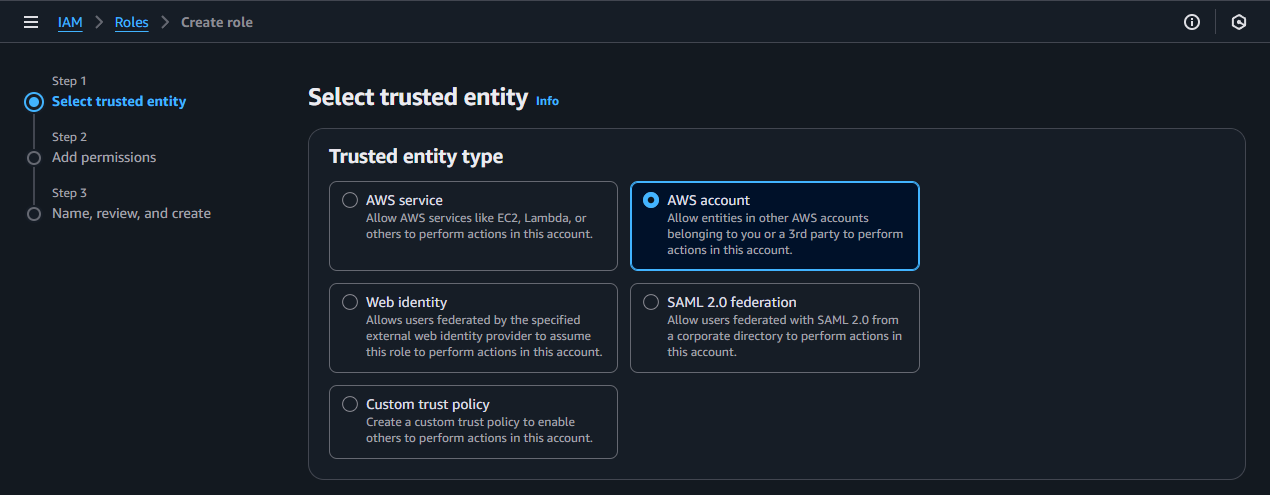

3. Select **Another AWS account** and type **522814692014** 

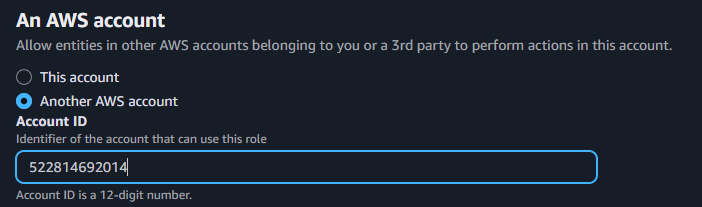

4. Select **Require external ID** and type in your **Q-CTRL organization ID**, accessible at [Q-CTRL Accounts](https://accounts.q-ctrl.com/)

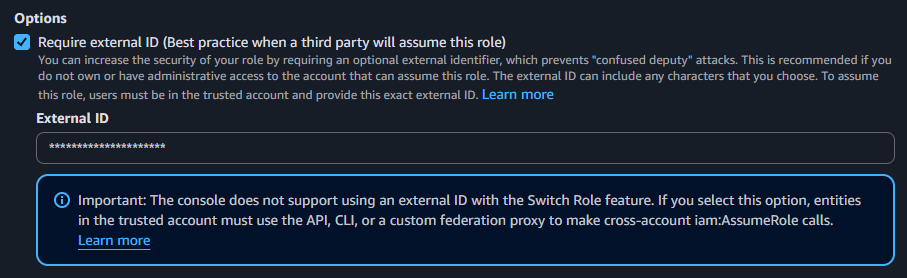

5. Click **Next** and search and check the **AmazonBraketFullAccess** policy for **Add permissions**

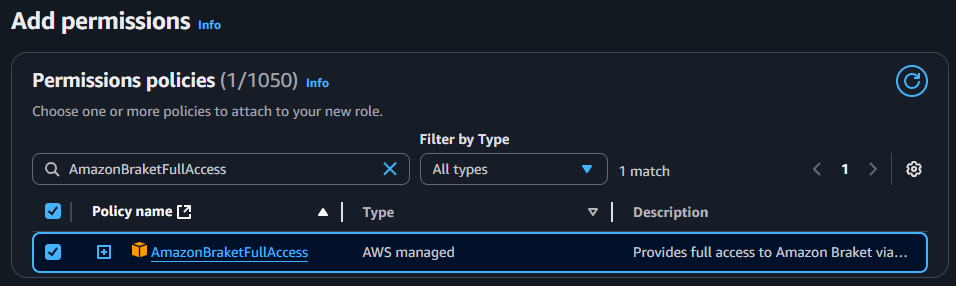

6. Click **Next** and enter a role name for **Role details** and keep note of it as you will use it later.

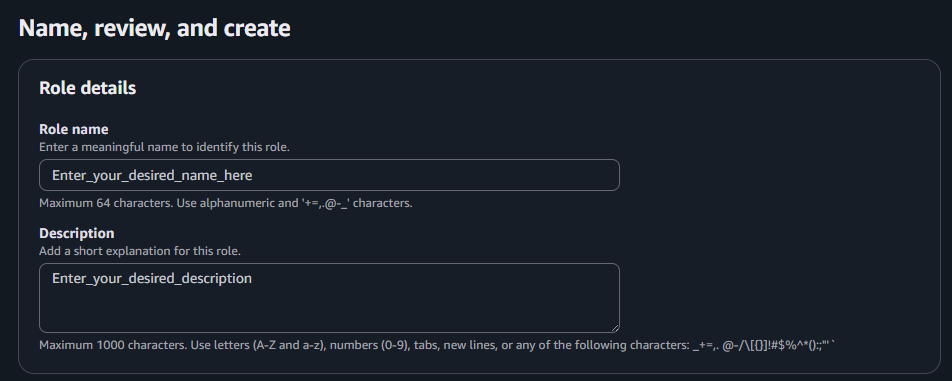

7. Click **Create role**

### Step 3.2: Define your Amazon Braket credentials in code

Next, you will want to create `credentials` which will enable you to submit quantum tasks to IonQ devices using the Fire Opal Python package.

#### Step 3.2.1: Authenticate your Q-CTRL account using an API key

Because Fire Opal requires an account, you must first authenticate with Fire Opal. When using an AWS web based environment, you’ll have to authenticate with an API key. You may follow the instructions to [authenticate using an API key](https://docs.q-ctrl.com/fire-opal/discover/start-using/how-to-set-up-and-install-fire-opal), or briefly, you can do so by navigating to your [Q-CTRL account](https://accounts.q-ctrl.com/security?organization=), locating your API key, pasting it below and running the following cell.

In [ ]:
fo.authenticate_qctrl_account(api_key="Your Q-CTRL API Key")

Q-CTRL authentication successful!


### Step 3.2.2: (Optional) Specifying your Q-CTRL organization

If your Q-CTRL account is a member of multiple organizations, you must specify which organization to use by setting the organization parameter, replace `organization_slug` with the unique identifier listed in your organization details. You can check organization names and other details by visiting [Q-CTRL Accounts](https://accounts.q-ctrl.com/).  

In [ ]:
fo.config.configure_organization(organization_slug="organization_slug")

Now that you have authenticated your Q-CTRL account, run the following cell to create `credentials`. 

In [ ]:
credentials = fo.credentials.make_credentials_for_braket(arn="your_role_arn")

## Step 4: Select the IonQ quantum device

There are several ways to determine which IonQ device you have access to. Fire Opal provides a programmatic way to obtain this information with the function `show_supported_devices`. We highly recommend using this as it cross-compares the devices you have access to with those supported by Fire Opal. 

In [ ]:
supported_devices = fo.show_supported_devices(credentials=credentials)[
    "supported_devices"
]
for name in supported_devices:
    print(name)

## Step 5: Submit the quantum program to run

When you are ready to select one of the devices above, copy and paste the device's name below to set the `backend_name`. Then, run the following cell to submit the circuit defined in Step 2 to run on that device.

In [ ]:
backend_name = "PASTE_NAME_FROM_PREVIOUS_STEP"  # Run Step 4 to obtain device names

fire_opal_job = fo.execute(
    circuits=[circuit_qasm],
    shot_count=shot_count,
    credentials=credentials,
    backend_name=backend_name,
)

### Step 5.1: Retrieve the results

Running a quantum program may take anywhere between a few seconds to potentially hours, depending on the device's job queue. Devices in high demand typically have long wait times. Because of this, Fire Opal is built such that the `execute` function will not block your program waiting for a result. Instead, you can ask Fire Opal to poll for the result and wait using the `.result()` command shown here,

In [ ]:
fire_opal_result = fire_opal_job.result()

Depending on the device queue times and the progress of your job, this cell may finish quickly or have to wait for a result. The status of your job may also be viewed on Amazon Braket, under [Quantum tasks](https://us-east-1.console.aws.amazon.com/braket/home?region=us-east-1#/tasks).

### Optional: Retrieve the results later

If you run a job and then close out of your notebook session, you may retrieve the job results later using the Fire Opal activity monitor and the `get_result` function. For more information, please see [How to view previous jobs and retrieve results](https://docs.q-ctrl.com/fire-opal/execute/submit-jobs/how-to-view-previous-jobs-and-retrieve-results).

## Step 6: Understand the results

Running a quantum circuit results in a collection of bitstrings and how often each was measured. This is best understood by plotting a histogram relating bitstrings to their frequency of occurrence. The following cell provides a few helpful plotting functions and then plots the results from above.

Success probability: 99.28%


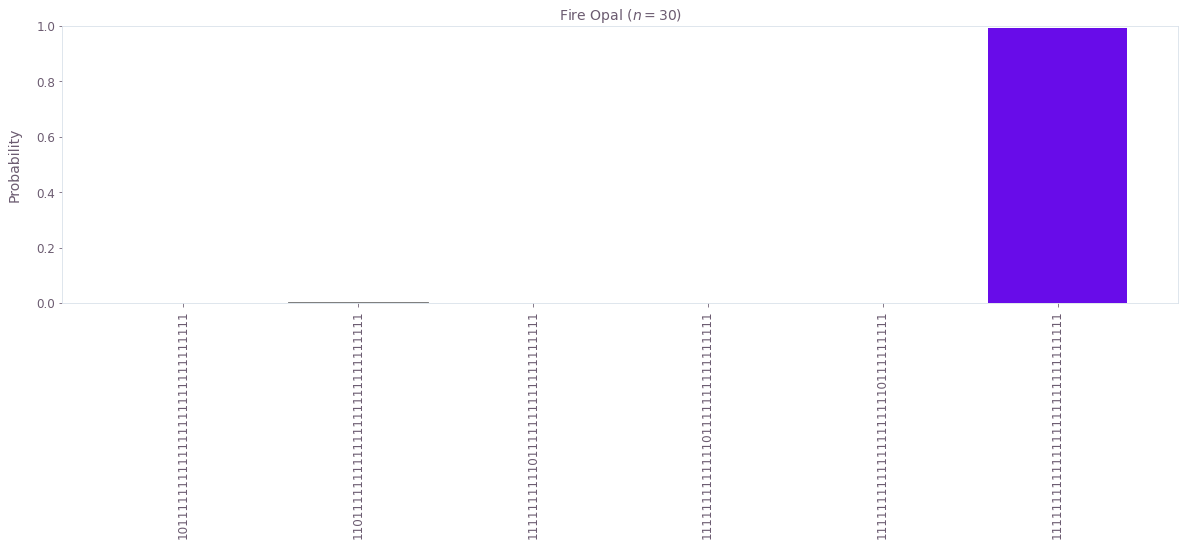

In [ ]:
plt.style.use(qv.get_qctrl_style())


def plot_bv_results(results, hidden_string, title="", max_columns=None):
    """
    Plot a probability histogram and highlight the hidden string.
    """

    # Restrict the number of columns displayed.
    if max_columns is not None:
        top_strings = sorted(results.keys(), key=lambda x: results[x], reverse=True)[
            :max_columns
        ]
        if hidden_string not in top_strings:
            top_strings.append(hidden_string)
        results = {s: results.get(s, 0) for s in top_strings}

    bitstrings = sorted(results.keys())

    def to_probability(value, total):
        if isinstance(value, float):
            return value
        return value / total

    probabilities = [to_probability(results[b], shot_count) for b in bitstrings]
    plt.figure(figsize=(20, 5))
    bars = plt.bar(bitstrings, probabilities)
    plt.xticks(rotation=90)

    for index, bitstring in enumerate(bitstrings):
        if bitstring != hidden_string:
            bars[index].set_color("grey")

    plt.ylabel("Probability")
    plt.ylim([0, 1])
    plt.title(title)
    plt.show()


def bitstring_count_to_probabilities(data, shot_count, number_of_counting_qubits):
    """
    Process the results.
    This function turns a dictionary of bitstring counts into a dictionary
    of probabilities.
    """
    probabilities = {
        format(int(bitstring, 2), f"0{number_of_counting_qubits+1}b"): (
            bitstring_count / shot_count
        )
        for bitstring, bitstring_count in data.items()
    }

    return probabilities


fire_opal_results = fire_opal_result["results"]
bitstring_results = {key[:-1]: value for key, value in fire_opal_results[0].items()}
if hidden_string not in bitstring_results:
    print("The hidden_bitstring has 0% probability.")
else:
    print(f"Success probability: {100 * bitstring_results[hidden_string]:.2f}%")

plot_bv_results(
    bitstring_results,
    hidden_string=hidden_string,
    title="Fire Opal ($n=30$)",
    max_columns=100,
)

Congratulations! 🔥 You have now successfully run a quantum program consisting of a 31 qubit Bernstein–Vazirani circuit.

## Optional: Compare Fire Opal to IonQ

If you are seeking a comparison, you may run the same program using IonQ, without realizing the error suppression benefits Fire Opal includes. The code below uses the same IonQ device as used previously to get a one-to-one comparison. Note that this job too is subject to the device queue and therefore may take anywhere from seconds to potentially hours.

In [ ]:
device = AwsDevice(arn="arn from selected device")

In [ ]:
from braket.ir.openqasm import Program as OpenQASMProgram

ionq_job = device.run(OpenQASMProgram(source=circuit_qasm), shots=shot_count)

In [ ]:
from braket.aws import AwsSession, AwsQuantumTask

# Restore task with unique arn
task_load = AwsQuantumTask("TASK_ID")
# Retrieve the result of the task
result = task_load.result()
counts = result.measurement_counts
aws_probabilities_ancilla = bitstring_count_to_probabilities(counts, shot_count, n)
aws_probabilities = {
    key[:-1]: value for key, value in aws_probabilities_ancilla.items()
}

Success probability: 86.23%


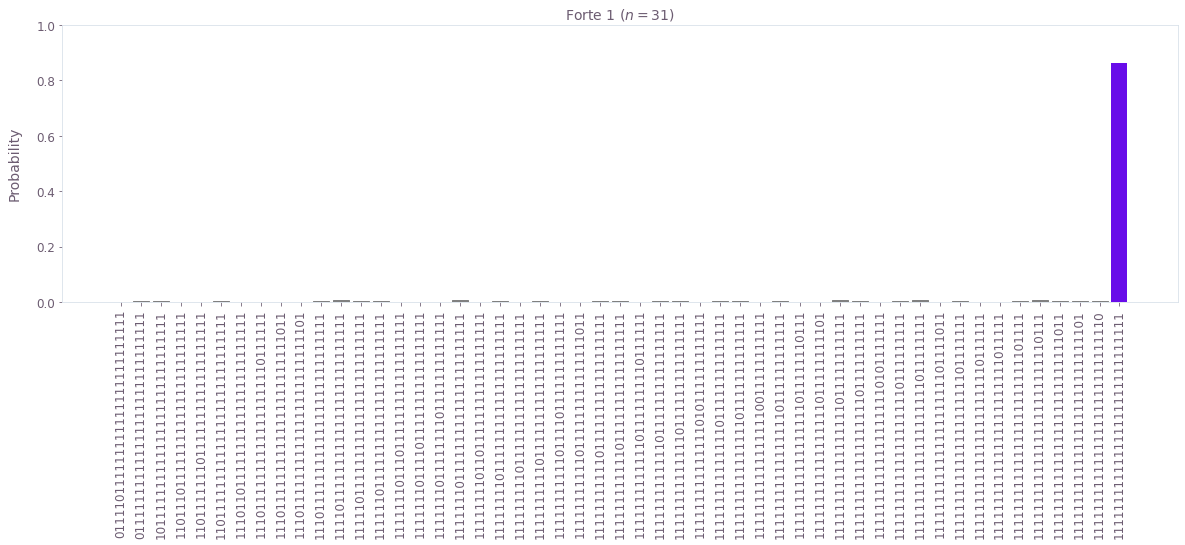

In [ ]:
if hidden_string not in aws_probabilities:
    print("The hidden_bitstring has 0% probability.")
else:
    print(f"Success probability: {100 * aws_probabilities[hidden_string]:.2f}%")

plot_bv_results(
    aws_probabilities,
    hidden_string=hidden_string,
    title=f"{device.name} ($n=31$)",
    max_columns=100,
)

You may now compare this bitstring histogram and success probability to the previous one obtained when using Fire Opal.

## Show packages used to run this notebook

The package versions below were used to produce this notebook.

In [2]:
from fireopal import print_package_versions

print_package_versions()

| Package               | Version |
| --------------------- | ------- |
| Python                | 3.12.9  |
| matplotlib            | 3.10.1  |
| networkx              | 2.8.8   |
| numpy                 | 1.26.4  |
| sympy                 | 1.13.3  |
| fire-opal             | 8.4.1   |
| qctrl-visualizer      | 8.0.2   |
| qctrl-workflow-client | 5.5.0   |
